In [13]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import optimize
from scipy.stats import norm
from scipy.stats import boxcox
from scipy.stats.distributions import gamma, norm, lognorm, beta
import math
import numpy as np

In [15]:
os.chdir('C:\\Users\\atmae\\Desktop\\итмо\\Многомерный анализ\\Лаба')
data=pd.read_csv('weatherHistory.csv')

In [16]:
data.shape

(96453, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [18]:
sample_data = data.sample(frac =.95, random_state = 100)

In [19]:
sample_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
48732,2011-06-29 12:00:00.000 +0200,Partly Cloudy,rain,22.200000,22.200000,0.76,12.3165,311.0,11.2700,0.0,1009.63,Mostly cloudy throughout the day.
20867,2008-01-25 11:00:00.000 +0100,Mostly Cloudy,rain,4.811111,1.644444,0.61,14.2968,281.0,8.1305,0.0,1035.88,Partly cloudy starting in the morning continui...
87385,2015-09-26 04:00:00.000 +0200,Overcast,rain,14.422222,14.422222,0.96,3.0429,244.0,3.9123,0.0,1014.02,Foggy in the morning.
21561,2008-07-23 09:00:00.000 +0200,Overcast,rain,12.777778,12.777778,0.96,14.3934,292.0,11.0446,0.0,1008.59,Mostly cloudy throughout the day.
30624,2009-07-07 00:00:00.000 +0200,Mostly Cloudy,rain,21.666667,21.666667,0.71,17.7100,320.0,16.1000,0.0,1008.70,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
67108,2013-03-05 05:00:00.000 +0100,Clear,snow,-3.916667,-3.916667,0.99,1.5939,35.0,6.1985,0.0,1028.81,Partly cloudy starting in the afternoon.
81934,2015-01-15 01:00:00.000 +0100,Mostly Cloudy,rain,4.366667,0.811111,0.83,16.1483,310.0,7.3577,0.0,1019.22,Partly cloudy until night.
5152,2006-03-11 16:00:00.000 +0100,Partly Cloudy,rain,7.872222,5.950000,0.69,10.8031,330.0,11.4471,0.0,1003.60,Foggy overnight.
36216,2010-08-25 00:00:00.000 +0200,Partly Cloudy,rain,19.311111,19.311111,0.90,3.3649,281.0,14.9086,0.0,1012.39,Mostly cloudy throughout the day.


In [20]:
df_temperature = sample_data['Temperature (C)']
df_pressure = sample_data['Pressure (millibars)']
df_wind_speed = sample_data['Wind Speed (km/h)']

In [21]:
data_plot=[(df_temperature,'Temperature (C)'),(df_pressure,'Pressure (millibars)'), (df_wind_speed,'Wind Speed (km/h)')]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


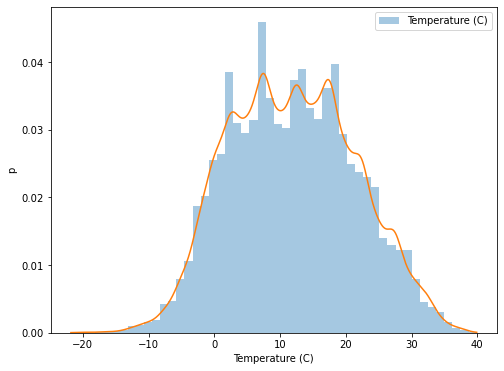

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


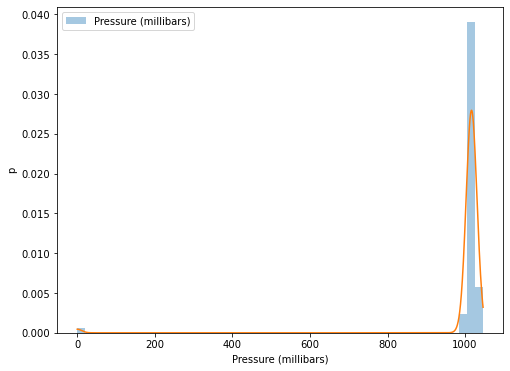

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


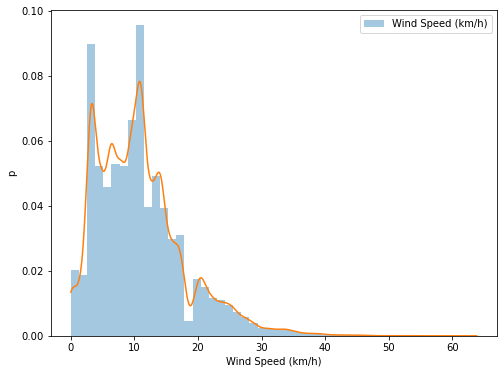

In [22]:
for i,j in data_plot:

    plt.figure(figsize=(8, 6))

    kernel = scipy.stats.gaussian_kde(i)

    min_amount, max_amount = i.min(), i.max()
    x = np.linspace(min_amount, max_amount, len(i))
    kde_values = kernel(x)

    sns.distplot(i, kde=False, norm_hist=True, label=j)
    plt.plot(x, kde_values)

    plt.ylabel('p')
    plt.xlabel(j)
    # Display values along the abscissa axis only in the interval [0, 10000]

    plt.legend()
    plt.show()

In [23]:
sample_data[['Temperature (C)', 'Pressure (millibars)','Wind Speed (km/h)']] .describe()

,Temperature (C),Pressure (millibars),Wind Speed (km/h)
count,91630.000000,91630.000000,91630.000000
mean,11.930460,1003.186825,10.820936
std,9.555230,117.176660,6.917875
min,-21.822222,0.000000,0.000000
25%,4.677778,1011.900000,5.860400
50%,12.000000,1016.440000,9.965900
75%,18.838889,1021.090000,14.135800
max,39.905556,1046.380000,63.852600


{'whiskers': [<matplotlib.lines.Line2D at 0x1b9ace84430>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9ace84af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9ace840d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9ace8f1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9ace8f4f0>],
 'means': []}

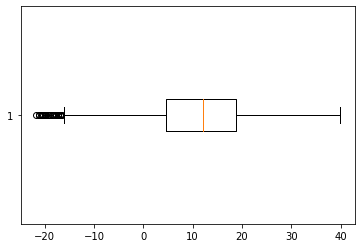

In [24]:
plt.boxplot(df_temperature, vert = 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9aced7ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9acee43a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9aced7910>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9acee4a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9acee4d60>],
 'means': []}

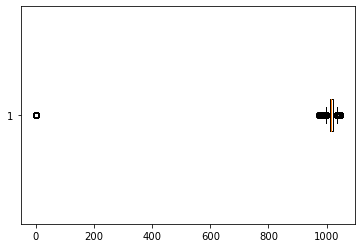

In [25]:
plt.boxplot(df_pressure, vert = 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9acf3c190>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9acf3c880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9acf2fdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9acf3cf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9ad3b7280>],
 'means': []}

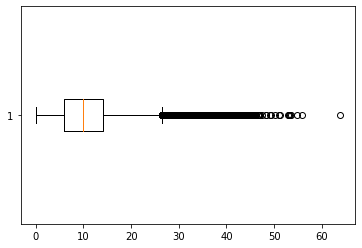

In [26]:
plt.boxplot(df_wind_speed, vert = 0)

In [27]:
#several changes for temperature
min_val = -15
max_val = 40
df_temperature = df_temperature[(df_temperature>min_val) & (df_temperature<max_val)]
print('Shape: ',df_temperature.shape)

Shape:  (91563,)


In [28]:
# several changes for pressure
min_val = 1000
max_val = 1030
df_pressure = df_pressure[(df_pressure>min_val) & (df_pressure<max_val)]
print('Shape: ',df_pressure.shape)

Shape:  (83903,)


In [29]:
# several changes for wind speed
min_val = 0
max_val =49
df_wind_speed = df_wind_speed[(df_wind_speed>min_val) & (df_wind_speed<max_val)]
print('Shape: ',df_wind_speed.shape)

Shape:  (90387,)


In [30]:
# build after some changes
data_plot=[(df_temperature,'Temperature (C)'),(df_pressure,'Pressure (millibars)'), (df_wind_speed,'Wind Speed (km/h)')]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


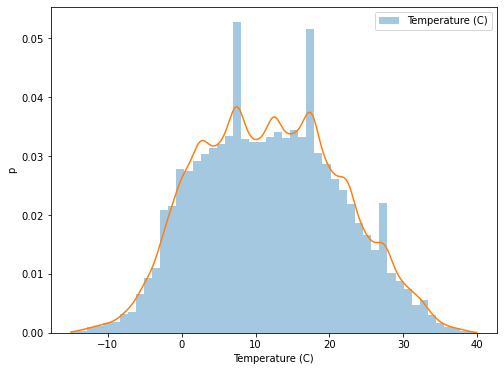

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


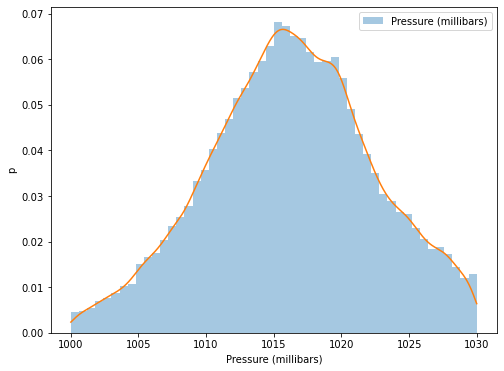

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


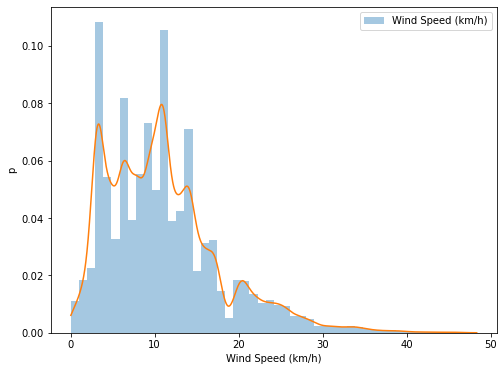

In [31]:
for i,j in data_plot:

    plt.figure(figsize=(8, 6))

    kernel = scipy.stats.gaussian_kde(i)

    min_amount, max_amount = i.min(), i.max()
    x = np.linspace(min_amount, max_amount, len(i))
    kde_values = kernel(x)

    sns.distplot(i, kde=False, norm_hist=True, label=j)
    plt.plot(x, kde_values)

    plt.ylabel('p')
    plt.xlabel(j)
    # Display values along the abscissa axis only in the interval [0, 10000]

    plt.legend()
    plt.show()

0.10    -0.116667
0.25     4.727778
0.50    12.016667
0.75    18.838889
0.90    24.905556
Name: Temperature (C), dtype: float64

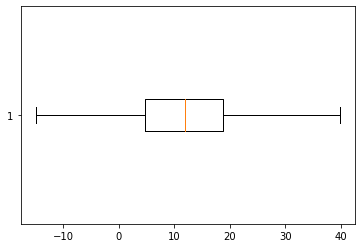

In [32]:
box_temperature = plt.boxplot(df_temperature, vert = 0)
box_temperature
df_temperature.quantile(q=(0.1,0.25,0.5,0.75,0.9))

0.10    1008.18
0.25    1012.16
0.50    1016.28
0.75    1020.38
0.90    1024.52
Name: Pressure (millibars), dtype: float64

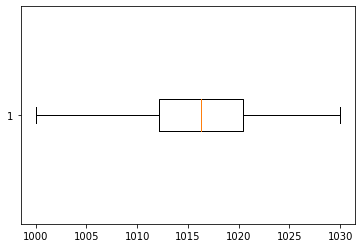

In [33]:
box_pressure = plt.boxplot(df_pressure, vert = 0)
box_pressure
df_pressure.quantile(q=(0.1,0.25,0.5,0.75,0.9))

0.10     3.2200
0.25     6.0697
0.50    10.1591
0.75    14.1680
0.90    20.4953
Name: Wind Speed (km/h), dtype: float64

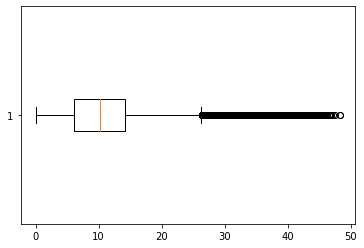

In [34]:
box_wind_speed = plt.boxplot(df_wind_speed, vert = 0)
box_wind_speed
df_wind_speed.quantile(q=(0.1,0.25,0.5,0.75,0.9))

In [35]:
# some transformations for temperature before
df_temperature, a = scipy.stats.yeojohnson(df_temperature)
df_temperature = pd.Series(df_temperature)

alpha= 10.055823562730879, beta = 8.007081920286353


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


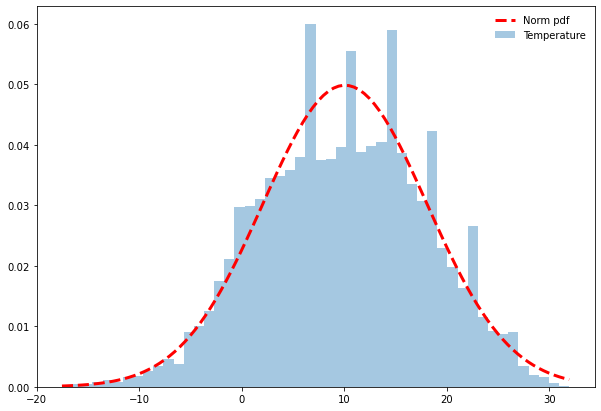

In [36]:
#LM for Temperature (norm)
params_norm_temperature = scipy.stats.norm.fit(df_temperature) 
print(f'alpha= {params_norm_temperature[0]}, beta = {params_norm_temperature[1]}')

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_temperature, kde=False, norm_hist=True, label = 'Temperature')
x = np.linspace(df_temperature.min(),df_temperature.max(), 100, dtype=np.float64)

ax.plot(x, scipy.stats.norm.pdf(x,params_norm_temperature[0], params_norm_temperature[1]), "r--",linewidth = 3,label='Norm pdf')
ax.legend(loc='best', frameon=False)

s = 687.625229399559, loc = -200.85213259947813, scale = 0.3067163118987254


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


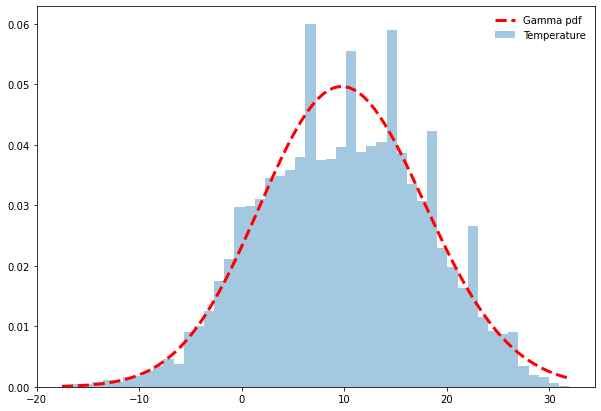

In [37]:
#LM for Temperature (gamma)
params_gamma_temperature = scipy.stats.gamma.fit(df_temperature) 
print(f's = {params_gamma_temperature[0]}, loc = {params_gamma_temperature[1]}, scale = {params_gamma_temperature[2]}')

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_temperature, kde=False, norm_hist=True, label = 'Temperature')
x = np.linspace(df_temperature.min(),df_temperature.max(), 100, dtype=np.float64)

ax.plot(x, gamma.pdf(x,params_gamma_temperature[0], params_gamma_temperature[1], params_gamma_temperature[2]), "r--",linewidth = 3,label='Gamma pdf')
ax.legend(loc='best', frameon=False)

[10.19638957  8.54074035]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


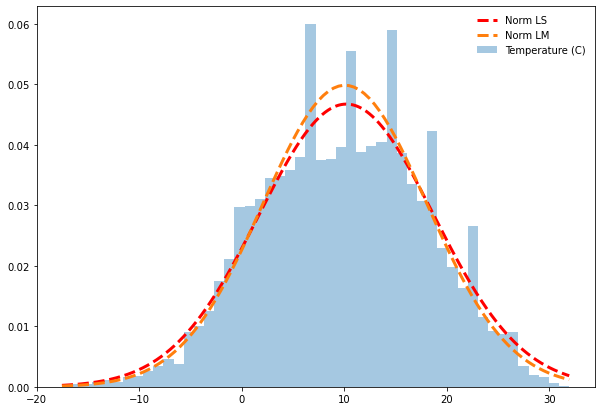

In [38]:
#LS for Temperature norm

a, b = params_norm_temperature[0], params_norm_temperature[1]
def func_pdf(x,a,b):
    return norm.pdf(x,a,b)

hist, bin_edges = np.histogram(df_temperature, bins=50, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
pos = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res = optimize.curve_fit(func_pdf, pos, freq)[0]
print(res)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_temperature, kde=False, norm_hist=True, label = 'Temperature (C)')
x = np.linspace(np.min(df_temperature), np.max(df_temperature), 100, dtype=np.float64)
ax.plot(sorted(df_temperature), func_pdf(sorted(df_temperature), res[0],res[1]), 'r--',linewidth = 3,label='Norm LS')
ax.plot(x, scipy.stats.norm.pdf(x,*params_norm_temperature), "--",linewidth = 3,label='Norm LM')
ax.legend(loc='best', frameon=False)
plt.show()

[ 6.75e+02 -2.00e+02  5.00e-01]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


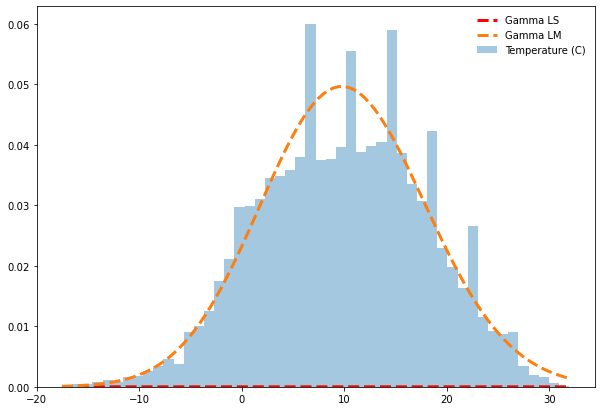

In [39]:
#LS for Temperature gamma (не подходит)

a, b, c= params_gamma_temperature[0], params_gamma_temperature[1], params_gamma_temperature[2]
def func_pdf(x,a,b,c):
    return gamma.pdf(x,a,b,c)

hist, bin_edges = np.histogram(df_temperature, bins=50, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
pos = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res = optimize.curve_fit(func_pdf, pos, freq, bounds=[(650,-250,0),(700,-150,1)])[0]
print(res)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_temperature, kde=False, norm_hist=True, label = 'Temperature (C)')
x = np.linspace(np.min(df_temperature), np.max(df_temperature), 100, dtype=np.float64)
ax.plot(sorted(df_temperature), func_pdf(sorted(df_temperature), res[0],res[1],res[2]), 'r--',linewidth = 3,label='Gamma LS')
ax.plot(x, scipy.stats.gamma.pdf(x,*params_gamma_temperature), "--",linewidth = 3,label='Gamma LM')
ax.legend(loc='best', frameon=False)
plt.show()

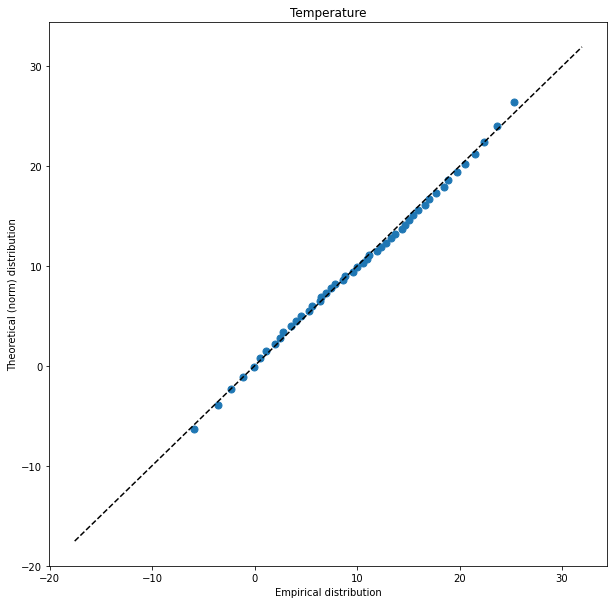

In [40]:
# Temperature (normal)
percs = np.linspace(0, 100)
qn_first = np.percentile(df_temperature, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params_norm_temperature)
x = np.linspace(np.min(df_temperature), np.max(df_temperature))
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=7)
plt.plot(x, x, color="black", ls="--")
plt.title('Temperature')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()

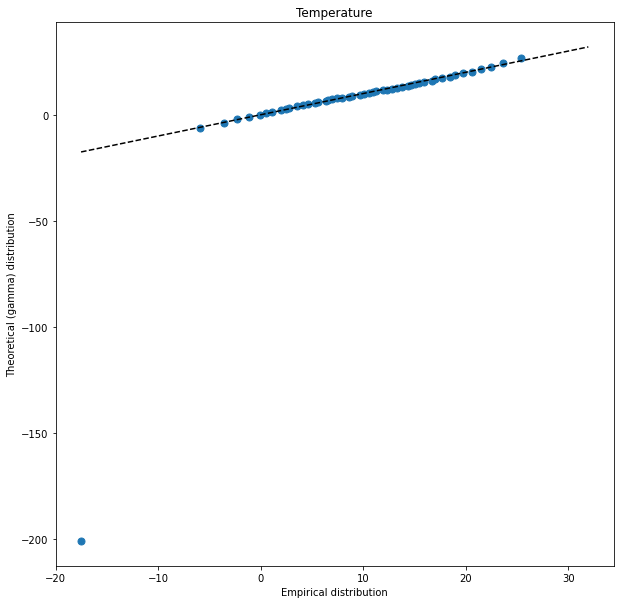

In [41]:
# Temperature (gamma)
percs = np.linspace(0, 100)
qn_first = np.percentile(df_temperature, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params_gamma_temperature)
x = np.linspace(np.min(df_temperature), np.max(df_temperature))
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=7)
plt.plot(x, x, color="black", ls="--")
plt.title('Temperature')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

In [70]:
# Temperature
x = scipy.stats.norm.rvs( *params_norm_temperature,size=len(data))
ks_norm = scipy.stats.kstest(x, 'norm', params_norm_temperature, N=100)
#cram = scipy.stats.cramervonmises(x)
shapiro = scipy.stats.shapiro(x)
jarque_bera = scipy.stats.jarque_bera(x)

# for normal
print(ks_norm)
print(shapiro)
print(jarque_bera)

KstestResult(statistic=0.0016687683188367775, pvalue=0.9506300807029824)
ShapiroResult(statistic=0.9999754428863525, pvalue=0.8088440895080566)
Jarque_beraResult(statistic=3.67544713881148, pvalue=0.15917937477381594)


alpha= 1016.2542342943639, beta = 6.124628705198582


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


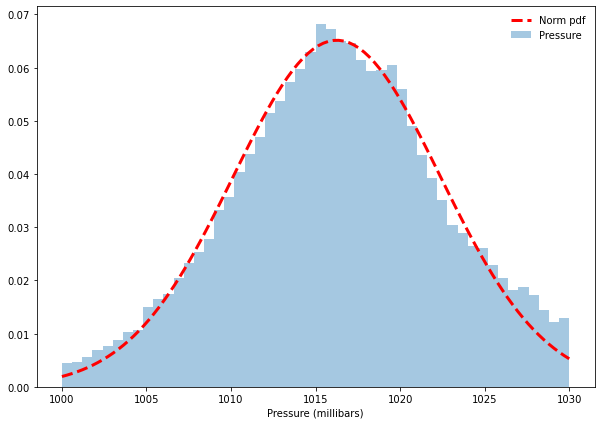

In [43]:
#LM for Pressure (norm)
params_norm_pressure = scipy.stats.norm.fit(df_pressure) 
print(f'alpha= {params_norm_pressure[0]}, beta = {params_norm_pressure[1]}')

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_pressure, kde=False, norm_hist=True, label = 'Pressure')
x = np.linspace(df_pressure.min(),df_pressure.max(), 100, dtype=np.float64)

ax.plot(x, scipy.stats.norm.pdf(x,params_norm_pressure[0], params_norm_pressure[1]), "r--",linewidth = 3,label='Norm pdf')
ax.legend(loc='best', frameon=False)

s = 1119.6333211984456, loc = 810.9567601272388, scale = 0.1833490162934539


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


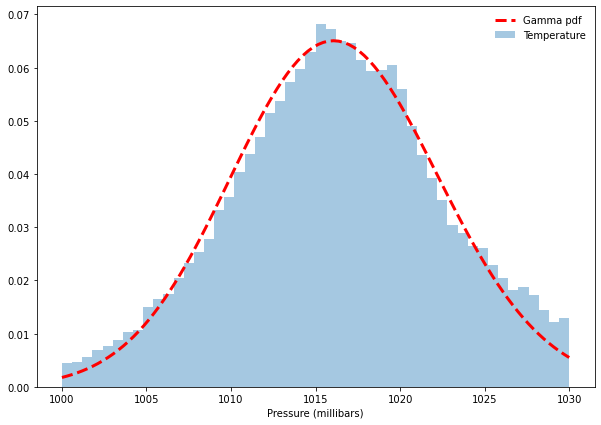

In [44]:
#LM for Pressure (gamma)
params_gamma_pressure = scipy.stats.gamma.fit(df_pressure) 
print(f's = {params_gamma_pressure[0]}, loc = {params_gamma_pressure[1]}, scale = {params_gamma_pressure[2]}')

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_pressure, kde=False, norm_hist=True, label = 'Temperature')
x = np.linspace(df_pressure.min(),df_pressure.max(), 100, dtype=np.float64)

ax.plot(x, gamma.pdf(x,params_gamma_pressure[0], params_gamma_pressure[1], params_gamma_pressure[2]), "r--",linewidth = 3,label='Gamma pdf')
ax.legend(loc='best', frameon=False)

[1016.35232401    6.27017615]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


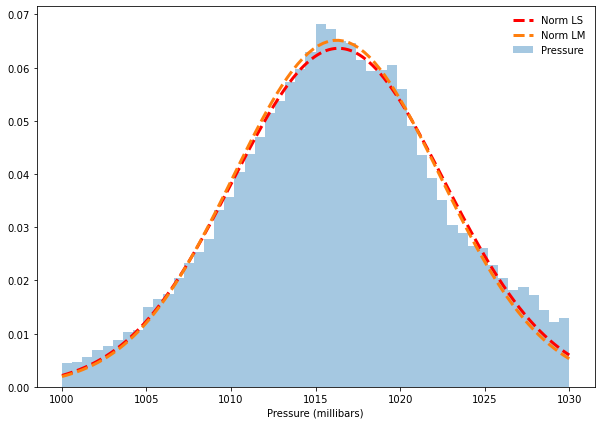

In [45]:
#LS for pressure normal

a, b = params_norm_pressure[0], params_norm_pressure[1]
def func_pdf(x,a,b):
    return norm.pdf(x,a,b)

hist, bin_edges = np.histogram(df_pressure, bins=50, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
pos = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res = optimize.curve_fit(func_pdf, pos, freq, bounds=[(1000,0), (1050,10)])[0]
print(res)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_pressure, kde=False, norm_hist=True, label = 'Pressure')
x = np.linspace(np.min(df_pressure), np.max(df_pressure), 100, dtype=np.float64)
ax.plot(sorted(df_pressure), func_pdf(sorted(df_pressure), res[0],res[1]), 'r--',linewidth = 3,label='Norm LS')
ax.plot(x, scipy.stats.norm.pdf(x,*params_norm_pressure), "--",linewidth = 3,label='Norm LM')
ax.legend(loc='best', frameon=False)
plt.show()

[1.1e+03 8.5e+02 5.0e-01]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


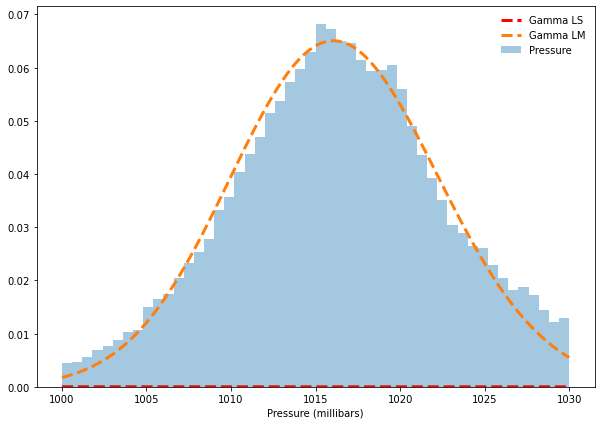

In [46]:
#LS for Pressure gamma (не подходит)

a, b, c= params_gamma_pressure[0], params_gamma_pressure[1], params_gamma_pressure[2]
def func_pdf(x,a,b,c):
    return gamma.pdf(x,a,b,c)

hist, bin_edges = np.histogram(df_pressure, bins=50, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
pos = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res = optimize.curve_fit(func_pdf, pos, freq, bounds=[(1000,800,0),(1200,900,1)])[0]
print(res)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_pressure, kde=False, norm_hist=True, label = 'Pressure')
x = np.linspace(np.min(df_pressure), np.max(df_pressure), 100, dtype=np.float64)
ax.plot(sorted(df_pressure), func_pdf(sorted(df_pressure), res[0],res[1],res[2]), 'r--',linewidth = 3,label='Gamma LS')
ax.plot(x, scipy.stats.gamma.pdf(x,*params_gamma_pressure), "--",linewidth = 3,label='Gamma LM')
ax.legend(loc='best', frameon=False)
plt.show()

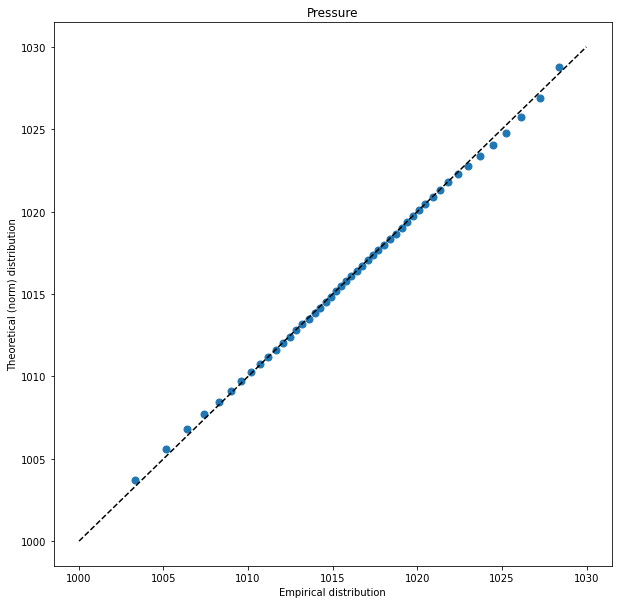

In [47]:
# Pressure (norm)
percs = np.linspace(0, 100)
qn_first = np.percentile(df_pressure, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params_norm_pressure)
x = np.linspace(np.min(df_pressure), np.max(df_pressure))
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=7)
plt.plot(x, x, color="black", ls="--")
plt.title('Pressure')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()

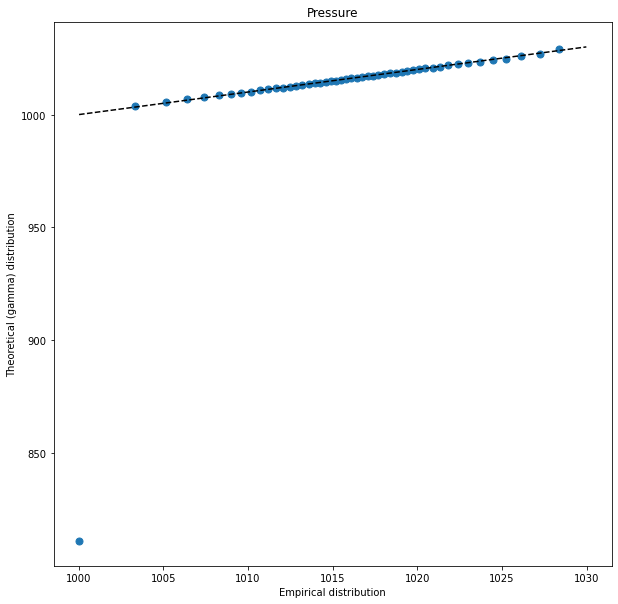

In [48]:
# Pressure (gamma)
percs = np.linspace(0, 100)
qn_first = np.percentile(df_pressure, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params_gamma_pressure)
x = np.linspace(np.min(df_pressure), np.max(df_pressure))
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=7)
plt.plot(x, x, color="black", ls="--")
plt.title('Pressure')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

In [76]:
# Pressure
x = scipy.stats.norm.rvs( *params_norm_pressure,size=len(data))
ks = scipy.stats.kstest(x, 'norm', params_norm_pressure, N=100)

shapiro = scipy.stats.shapiro(x)
jarque_bera = scipy.stats.jarque_bera(x)

print(ks)
print(shapiro)
print(jarque_bera)

KstestResult(statistic=0.0023099840410714667, pvalue=0.6811921242747011)
ShapiroResult(statistic=0.9996225833892822, pvalue=6.083106674631411e-12)
Jarque_beraResult(statistic=0.572161944272515, pvalue=0.7512017870707378)


s = 0.45347243410523447, loc = -3.847603404690867, scale = 13.383440542220127


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


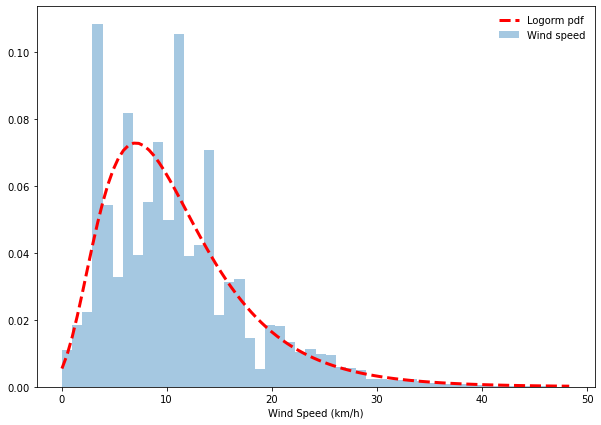

In [50]:
#LM for Wind speed (lognorm)
params_lognorm_wind_speed = scipy.stats.lognorm.fit(df_wind_speed) 
print(f's = {params_lognorm_wind_speed[0]}, loc = {params_lognorm_wind_speed[1]}, scale = {params_lognorm_wind_speed[2]}')

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_wind_speed, kde=False, norm_hist=True, label = 'Wind speed')
x = np.linspace(df_wind_speed.min(),df_wind_speed.max(), 100, dtype=np.float64)

ax.plot(x, scipy.stats.lognorm.pdf(x,params_lognorm_wind_speed[0], params_lognorm_wind_speed[1], params_lognorm_wind_speed[2]), "r--",linewidth = 3,label='Logorm pdf')
ax.legend(loc='best', frameon=False)

s = 2.7923136547826166, loc = -0.5281995325457605, scale = 4.114957466294445


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


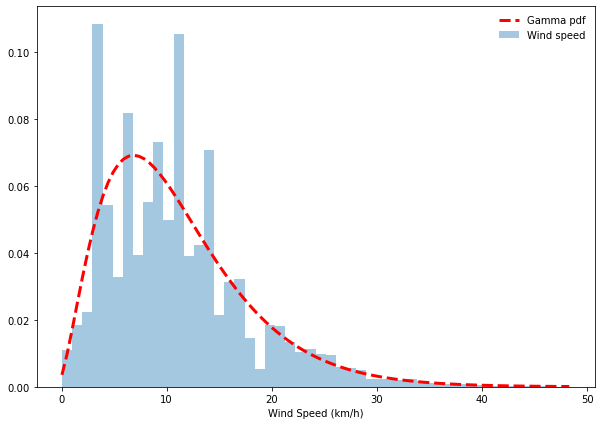

In [51]:
#LM for Wind speed (gamma)
params_gamma_wind_speed = scipy.stats.gamma.fit(df_wind_speed) 
print(f's = {params_gamma_wind_speed[0]}, loc = {params_gamma_wind_speed[1]}, scale = {params_gamma_wind_speed[2]}')

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_wind_speed, kde=False, norm_hist=True, label = 'Wind speed')
x = np.linspace(df_wind_speed.min(),df_wind_speed.max(), 100, dtype=np.float64)

ax.plot(x, scipy.stats.gamma.pdf(x,params_gamma_wind_speed[0], params_gamma_wind_speed[1], params_gamma_wind_speed[2]), "r--",linewidth = 3,label='Gamma pdf')
ax.legend(loc='best', frameon=False)

[ 0.33637804 -9.12434472 18.65538211]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


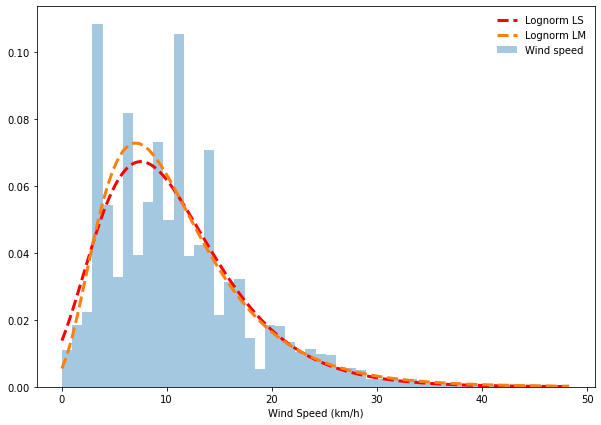

In [52]:
#LS for wind speed (lognorm)

a, b, c= params_lognorm_wind_speed[0], params_lognorm_wind_speed[1], params_lognorm_wind_speed[2]
def func_pdf(x,a,b,c):
    return lognorm.pdf(x,a,b,c)

hist, bin_edges = np.histogram(df_wind_speed, bins=50, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
pos = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res = optimize.curve_fit(func_pdf, pos, freq, bounds=[(0,-10,10),(1,0,20)])[0]
print(res)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_wind_speed, kde=False, norm_hist=True, label = 'Wind speed')
x = np.linspace(np.min(df_wind_speed), np.max(df_wind_speed), 100, dtype=np.float64)
ax.plot(sorted(df_wind_speed), func_pdf(sorted(df_wind_speed), res[0],res[1],res[2]), 'r--',linewidth = 3,label='Lognorm LS')
ax.plot(x, scipy.stats.lognorm.pdf(x,*params_lognorm_wind_speed), "--",linewidth = 3,label='Lognorm LM')
ax.legend(loc='best', frameon=False)
plt.show()

[ 2.79794232 -0.65906818  4.19952398]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


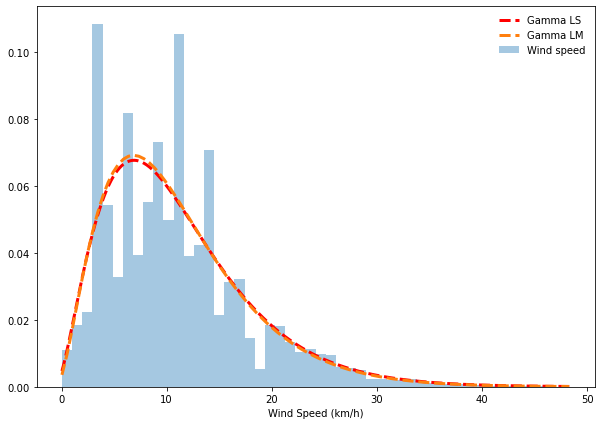

In [53]:
#LS for wind speed (gamma)

a, b, c= params_gamma_wind_speed[0], params_gamma_wind_speed[1], params_gamma_wind_speed[2]
def func_pdf(x,a,b,c):
    return gamma.pdf(x,a,b,c)

hist, bin_edges = np.histogram(df_wind_speed, bins=50, density=True)
freq = [hist[i] for i in range(len(hist) - 1)]
pos = [(bin_edges[i] + bin_edges[i+1])/2  for i in range(len(hist) - 1)]
res = optimize.curve_fit(func_pdf, pos, freq, bounds=[(0,-10,0),(5,0,10)])[0]
print(res)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
t=sns.distplot(df_wind_speed, kde=False, norm_hist=True, label = 'Wind speed')
x = np.linspace(np.min(df_wind_speed), np.max(df_wind_speed), 100, dtype=np.float64)
ax.plot(sorted(df_wind_speed), func_pdf(sorted(df_wind_speed), res[0],res[1],res[2]), 'r--',linewidth = 3,label='Gamma LS')
ax.plot(x, scipy.stats.gamma.pdf(x,*params_gamma_wind_speed), "--",linewidth = 3,label='Gamma LM')
ax.legend(loc='best', frameon=False)
plt.show()

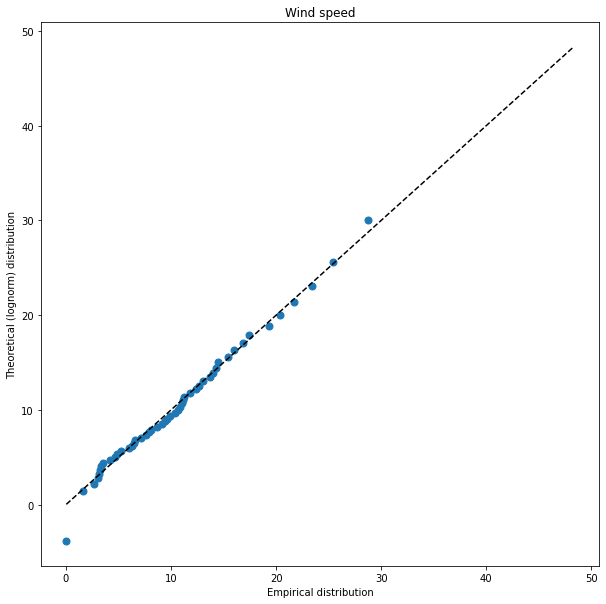

In [54]:
# Wind speed (lognorm)
percs = np.linspace(0, 100)
qn_first = np.percentile(df_wind_speed, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params_lognorm_wind_speed)
x = np.linspace(np.min(df_wind_speed), np.max(df_wind_speed))
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=7)
plt.plot(x, x, color="black", ls="--")
plt.title('Wind speed')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognorm) distribution')

plt.show()

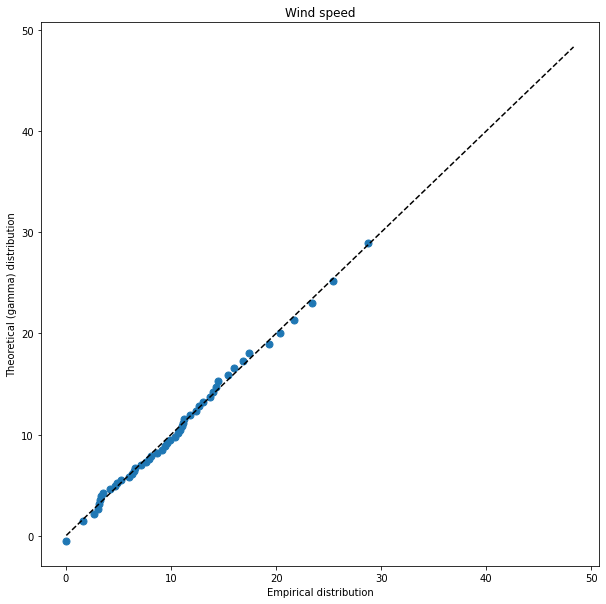

In [55]:
# Wind speed (gamma)
percs = np.linspace(0, 100)
qn_first = np.percentile(df_wind_speed, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params_gamma_wind_speed)
x = np.linspace(np.min(df_wind_speed), np.max(df_wind_speed))
# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=7)
plt.plot(x, x, color="black", ls="--")
plt.title('Wind speed')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

In [109]:
# Lognorm
x = scipy.stats.lognorm.rvs( *params_lognorm_wind_speed,size=len(data))
ks = scipy.stats.kstest(x, 'lognorm', params_lognorm_wind_speed, N=100)
chi2 = scipy.stats.chisquare(x)
cr =scipy.stats.cramervonmises(x, 'lognorm', params_lognorm_wind_speed)
print(ks)
print(cr)
# Gamma
x = scipy.stats.gamma.rvs( *params_gamma_wind_speed,size=len(data))
ks = scipy.stats.kstest(x, 'gamma', params_gamma_wind_speed, N=100)
chi2 = scipy.stats.chisquare(x)
cr =scipy.stats.cramervonmises(x, 'gamma', params_gamma_wind_speed)
print(ks)
print(cr)

KstestResult(statistic=0.004193773727738825, pvalue=0.06703958670129917)
CramerVonMisesResult(statistic=0.49300440257640427, pvalue=0.04149750739140867)
KstestResult(statistic=0.002153661171548582, pvalue=0.7613889005477772)
CramerVonMisesResult(statistic=0.06911870144713804, pvalue=0.7569854624968302)
